In [9]:
import numpy as np
import matplotlib.pyplot as plt

<StemContainer object of 3 artists>

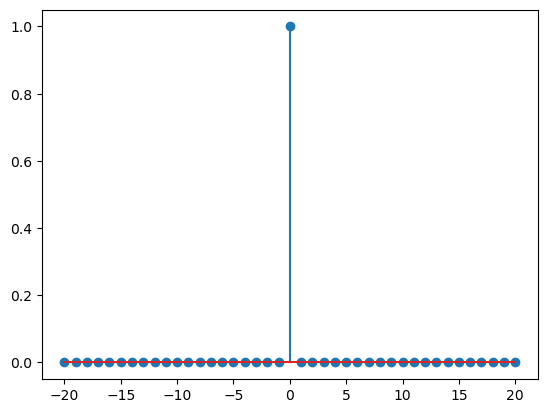

In [113]:

n = np.arange(-20,21)
delta = np.where(n==0,1,0)
plt.stem(n,delta)

<StemContainer object of 3 artists>

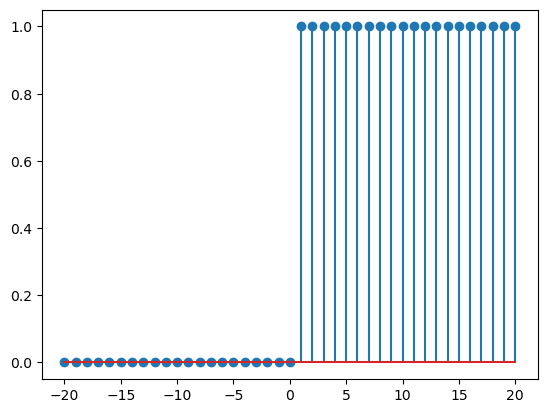

In [115]:
u = np.where(n>0,1,0)
plt.stem(n,u)

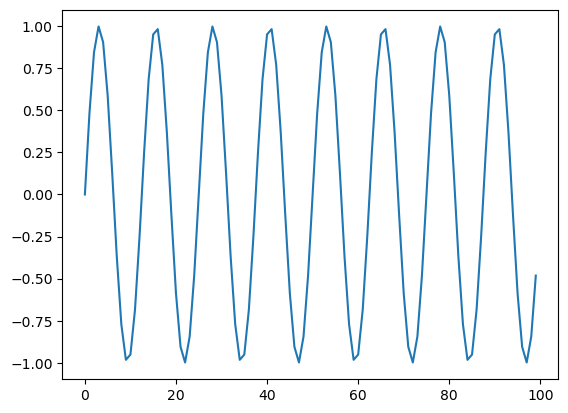

In [111]:
fs =5
f = 4
x = np.sin(0.2*np.pi*n*f/fs)
plt.plot(n,x)

In [73]:
n=np.arange(0,20)
x=np.zeros_like(n, dtype=float)
y = np.zeros_like(n, dtype=float)
x[0]=1
for i in range(0, len(n)):
    y[i] = 0.5*y[i-1]+x[i]

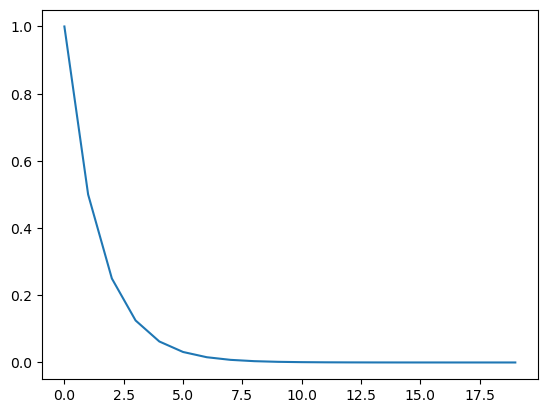

In [77]:
plt.plot(n,y)

In [75]:
print(y)

[1.00000000e+00 5.00000000e-01 2.50000000e-01 1.25000000e-01
 6.25000000e-02 3.12500000e-02 1.56250000e-02 7.81250000e-03
 3.90625000e-03 1.95312500e-03 9.76562500e-04 4.88281250e-04
 2.44140625e-04 1.22070312e-04 6.10351562e-05 3.05175781e-05
 1.52587891e-05 7.62939453e-06 3.81469727e-06 1.90734863e-06]


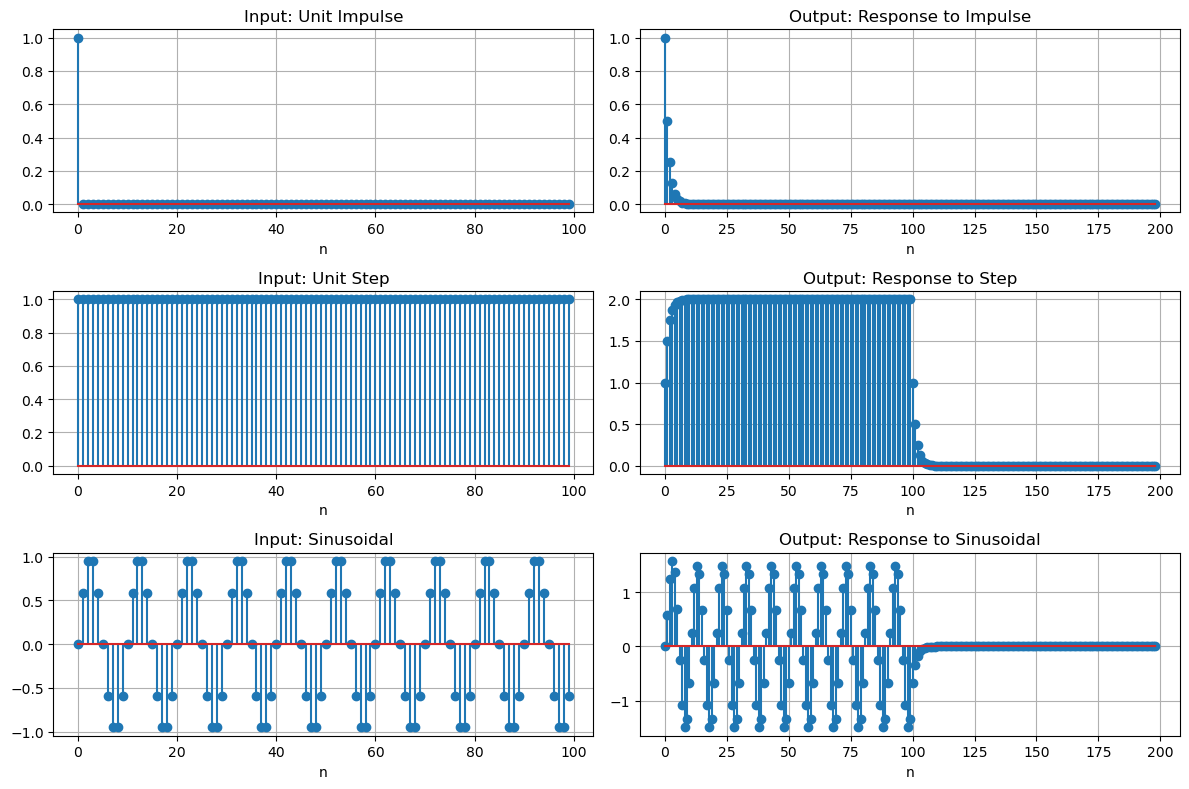

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Signal Definitions
# -----------------------------
n = np.arange(0, 100)

# Unit Impulse
x_impulse = np.zeros_like(n, dtype=float)
x_impulse[0] = 1

# Unit Step
x_step = np.ones_like(n, dtype=float)

# Sinusoidal Signal
fs = 10   # Sampling frequency
f = 1     # Frequency of sine wave
x_sine = np.sin(2 * np.pi * f * n / fs)

# -----------------------------
# System Definition
# y[n] = 0.5*y[n-1] + x[n]
# -----------------------------
def lti_response(x, a=0.5):
    y = np.zeros_like(x, dtype=float)
    for i in range(len(x)):
        if i == 0:
            y[i] = x[i]
        else:
            y[i] = a * y[i - 1] + x[i]
    return y

# -----------------------------
# Convolution Function (manual)
# -----------------------------
def manual_linear_convolution(x, h):
    N = len(x)
    M = len(h)
    y = np.zeros(N + M - 1)
    for n in range(len(y)):
        for k in range(N):
            if 0 <= n - k < M:
                y[n] += x[k] * h[n - k]
    return y

# -----------------------------
# Impulse Response
# -----------------------------
h = lti_response(x_impulse)

# Responses via convolution
y_impulse = manual_linear_convolution(x_impulse, h)
y_step = manual_linear_convolution(x_step, h)
y_sine = manual_linear_convolution(x_sine, h)

# -----------------------------
# Plotting
# -----------------------------
fig, axs = plt.subplots(3, 2, figsize=(12, 8))

# Impulse
axs[0, 0].stem(n, x_impulse, use_line_collection=True)
axs[0, 0].set_title('Input: Unit Impulse')
axs[0, 1].stem(np.arange(len(y_impulse)), y_impulse, use_line_collection=True)
axs[0, 1].set_title('Output: Response to Impulse')

# Step
axs[1, 0].stem(n, x_step, use_line_collection=True)
axs[1, 0].set_title('Input: Unit Step')
axs[1, 1].stem(np.arange(len(y_step)), y_step, use_line_collection=True)
axs[1, 1].set_title('Output: Response to Step')

# Sinusoid
axs[2, 0].stem(n, x_sine, use_line_collection=True)
axs[2, 0].set_title('Input: Sinusoidal')
axs[2, 1].stem(np.arange(len(y_sine)), y_sine, use_line_collection=True)
axs[2, 1].set_title('Output: Response to Sinusoidal')

for ax in axs.flat:
    ax.set_xlabel('n')
    ax.grid(True)

plt.tight_layout()
plt.show()


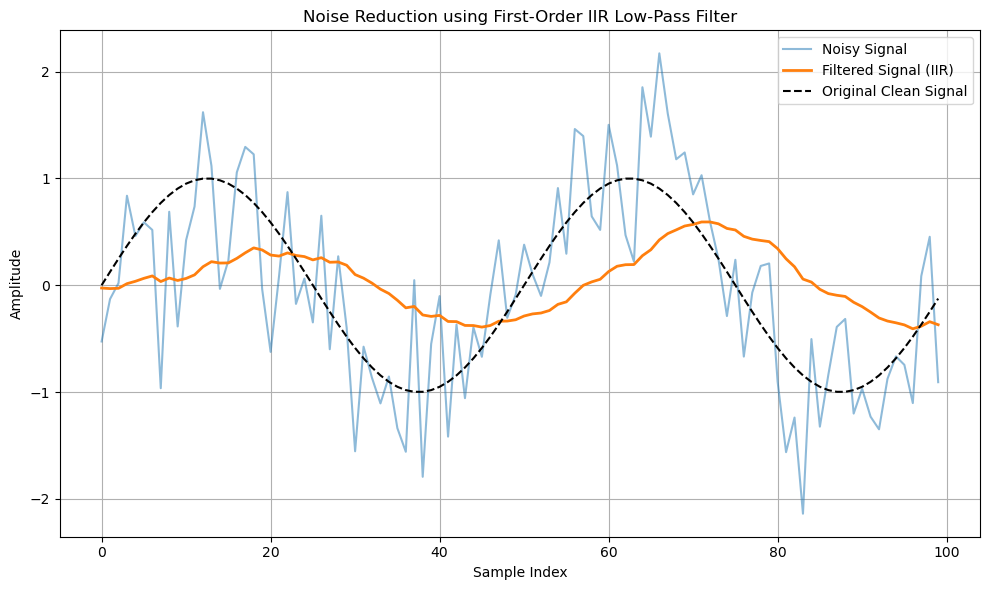

In [117]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a noisy signal (e.g., sinusoid + noise)
n = np.arange(0, 100)
fs = 100
f = 2
x = np.sin(2 * np.pi * f * n / fs)
noise = np.random.normal(0, 0.5, size=n.shape)
noisy_signal = x + noise

# Initialize filter output
filtered_signal = np.zeros_like(noisy_signal)

# Choose smoothing factor alpha (0 < alpha < 1)
alpha = 0.05 # Try 0.05 or 0.2 for more/less smoothing

# Apply the IIR filter
for i in range(len(noisy_signal)):
    if i == 0:
        filtered_signal[i] = alpha * noisy_signal[i]  # or filtered_signal[i] = noisy_signal[i]
    else:
        filtered_signal[i] = (1 - alpha) * filtered_signal[i - 1] + alpha * noisy_signal[i]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n, noisy_signal, label='Noisy Signal', alpha=0.5)
plt.plot(n, filtered_signal, label='Filtered Signal (IIR)', linewidth=2)
plt.plot(n, x, label='Original Clean Signal', linestyle='--', color='black')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('Noise Reduction using First-Order IIR Low-Pass Filter')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


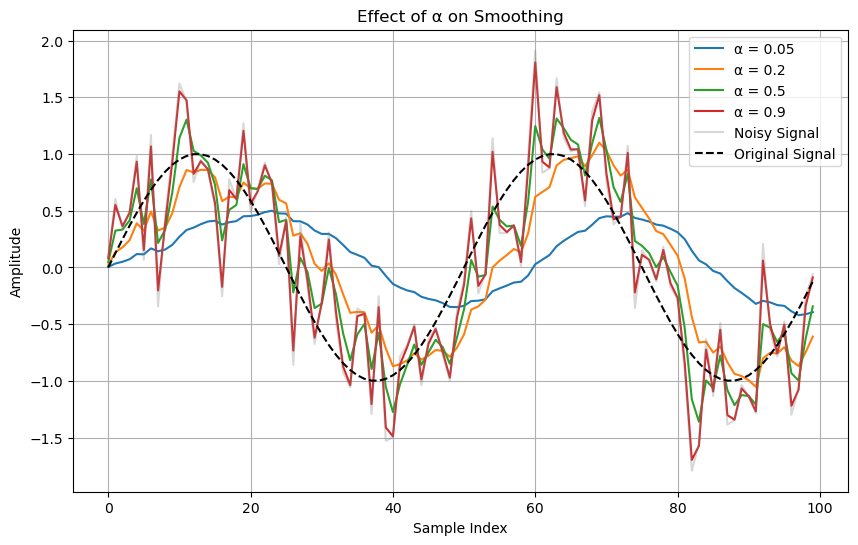

In [95]:
#Plot with different values of \alpha
alphas = [0.05, 0.2, 0.5, 0.9]
plt.figure(figsize=(10, 6))
for alpha in alphas:
    y = np.zeros_like(noisy_signal)
    for i in range(len(noisy_signal)):
        if i == 0:
            y[i] = alpha * noisy_signal[i]
        else:
            y[i] = (1 - alpha) * y[i - 1] + alpha * noisy_signal[i]
    plt.plot(n, y, label=f'α = {alpha}')

plt.plot(n, noisy_signal, label='Noisy Signal', alpha=0.3, color='gray')
plt.plot(n, x, label='Original Signal', linestyle='--', color='black')
plt.title('Effect of α on Smoothing')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()
